In [2]:
#importing the required libraries
import math 
import numpy as np
import random
import collections
%matplotlib inline
import matplotlib.pyplot as plt


#initialisations for the orignal version of algorithm
#dictionary and initial population


INT_MAX = 1000
dis = [[0]*20]*20
dis[0]  = [0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 150, INT_MAX, INT_MAX, 200, INT_MAX, 120, INT_MAX, INT_MAX]
dis[1]  = [INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 190, 400, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 130]
dis[2]  = [INT_MAX, INT_MAX, 0, 600, 220, 400, INT_MAX, INT_MAX, 200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
dis[3]  = [INT_MAX, INT_MAX, 600, 0, INT_MAX, 210, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, INT_MAX, INT_MAX]
dis[4]  = [INT_MAX, INT_MAX, 220, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
dis[5]  = [INT_MAX, INT_MAX, 400, 210, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 370, 600, 260, 900]
dis[6]  = [150, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 550, 180, INT_MAX, INT_MAX]
dis[7]  = [INT_MAX, 190, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 560, INT_MAX, INT_MAX, INT_MAX, 170]
dis[8]  = [INT_MAX, 400, 200, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600]
dis[9]  = [200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 560, INT_MAX, 0, INT_MAX, 160, INT_MAX, 500]
dis[10] = [INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, 370, 550, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 240, INT_MAX]
dis[11] = [120, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600, 180, INT_MAX, INT_MAX, 160, INT_MAX, 0, 400, INT_MAX]
dis[12] = [INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 260, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 240, 400, 0, INT_MAX]
dis[13] = [INT_MAX, 130, INT_MAX, INT_MAX, INT_MAX, 900, INT_MAX, 170, 600, 500, INT_MAX, INT_MAX, INT_MAX, 0]


distances={}
s="abcdefghijklmn"
l1=[]
c=0
for i in range(len(s)):
    l1.append(s[i])

for x in l1:
    distances[x]={}
    c2=0
    for ele in l1:
#         distances[x][ele]=dis[c][c2]/10
        if (dis[c][c2]==1000):
            distances[x][ele]=dis[c][c2]
        else:
            distances[x][ele]=dis[c][c2]/10
            
        c2+=1
    c+=1
    





mknbjgaeicldfh
[8, 21889.0]


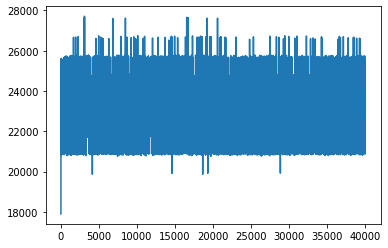

40000
17900.0


In [3]:
def reproduce_tsp(s1,s2):
    n=len(s1)
    
    list1=random.sample(range(0,n),2)
    list1.sort()
    
    sa=s1[list1[0]:list1[1]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[0]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[0],list1[1]):
        s+=s1[i]
        
    for i in range(list1[1],n):
        s+=l2[j]
        j+=1
    
    return s
    

def mutate_tsp(s):
    idx_list=random.sample(range(0,len(s)),2)
    
    ans=""
    idx_list.sort()
    for i in range(len(s)):
        if (i==idx_list[0]):
            ans+=s[idx_list[1]]
        elif (i==idx_list[1]):
            ans+=s[idx_list[0]]
        else:
            ans+=s[i]
    return ans



def cost_function(s):
    cost=0
    x=0
    lt1=[]
    for i in range(len(s)):
        j=(i+1)%(len(s))
        ele_i=s[i]
        ele_j=s[j]
        cost+=distances[ele_i][ele_j]
        if(distances[ele_i][ele_j]==INT_MAX):
            x+=1
    
    total=30*INT_MAX
    total-=cost
#     for i in range(x):
#         total=total/2
    

    lt1=[]
    lt1.append(x)
    lt1.append(total)
    
    return lt1


def random_selection_tsp(population):
    n=len(population)
    #calculate fitness function value for each individual
    fitness_values=[]
    for i in range(n):
        lt1=cost_function(population[i])
        fitness_values.append(lt1[1])
    return random.choices(population,weights=fitness_values,k=1)[0]


old_algo_tsp={}
population=["abcdefghijklmn" for i in range(20)]
possible_ans_tsp_1=[]

def genetic_algo_tsp(population):
    x=40000
    gen_no=1
    possible_ans_tsp_1.clear()
    flag_tsp_1=False
    while(x!=0):
        #taking care of the counter         
        x-=1
        
        #calculates the maximum fitness value of a generation
        n=len(population)
        average=-1
        for i in range(n):
            h=cost_function(population[i])
            average=max(average,h[1])
        
       
        old_algo_tsp[gen_no]=average
        
        gen_no+=1
        
        
        #the algorithm
        new_population=[]
        for i in range(n):
            s1=random_selection_tsp(population)
            s2=random_selection_tsp(population)
            s3=reproduce_tsp(s1,s2)
            #code for mutation goes here
            #for mutation, since it is rare lets benchmark
            #the peobablity to 0.1
            p=random.random()
            if (p>=0.4):
                new_population.append(mutate_tsp(s3))
            else:
                new_population.append(s3)
        population=new_population
        
        
        for i in range(len(population)):
            c=cost_function(population[i])
            
            if(c[0]==0 and c[1]==29626):
                flag_tsp_1=True
                possible_ans_tsp_1.append(population[i])
                gen_no+=1
                old_algo_tsp[gen_no]=c[1]
                break
                
        
        if (flag_tsp_1==True):
            break
                
            
    if(flag_tsp_1==True):
        for i in range(len(population)):
            c=cost_function(population[i])
            if(c[0]==0 and c[1]==29626):
                return population[i]
    
    idx=-1
    f_val=-1.0
    for i in range(n):
        c=cost_function(population[i])
        if (f_val < c[1]):
            f_val=c[1]
            idx=i
            
    if(idx==-1):
        return ""
    return population[idx]


x1=genetic_algo_tsp(population)
print(x1)
print(cost_function(x1))
list_temp_x=[]
list_temp_y=[]
for i in old_algo_tsp.keys():
    list_temp_x.append(i)
    list_temp_y.append(old_algo_tsp[i])

x=np.array(list_temp_x)
y=np.array(list_temp_y)
plt.plot(x,y)
plt.show()
print(np.amax(x))
print(np.amin(y))


# print(cost_function("abcedfghijlmnk"))
    
        
        

In [4]:
print(np.amax(y))

27705.0


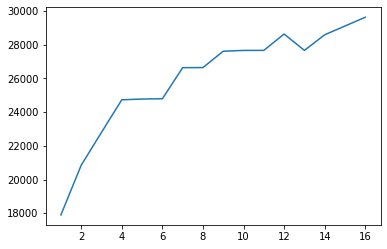

In [10]:
# def random_selection_tsp(population):
#     n=len(population)
#     #calculate fitness function value for each individual
#     fitness_values=[]
#     for i in range(n):
#         lt1=cost_function(population[i])
#         fitness_values.append(lt1[1])
#     return random.choices(population,weights=fitness_values,k=1)[0]

def random_selection_tsp_2(population):
    n=len(population)
    
    fitness_values=[]
    for i in range(n):
        lt1=cost_function(population[i])
        lt1[1]=lt1[1]/(2**lt1[0])
        fitness_values.append(lt1[1])
    
    return random.choices(population,weights=fitness_values,k=1)[0]
    

def reproduce_tsp_edited(s1,s2):
    n=len(s1)
    
    list1=random.sample(range(0,n),3)
    
    list1.sort()
    
    
    list_ans=[]
    #creating the first kid
    sa=s1[0:list1[0]]
    
    l2=[]
    
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=sa
    for i in range(len(l2)):
        s+=l2[i]
        
    list_ans.append(s)
    
    #creating the second child
    sa=s1[list1[0]:list1[1]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[0]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[0],list1[1]):
        s+=s1[i]
        
    for i in range(list1[1],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the third child
    sa=s1[list1[1]:list1[2]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[1]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[1],list1[2]):
        s+=s1[i]
        
    for i in range(list1[2],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the fourth child
    sa=s1[list1[2]:n]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=""
    for i in range(len(l2)):
        s+=l2[i]
    s+=sa
    
    list_ans.append(s)
    
    return list_ans
        

new_algo_entries_tsp={}
possible_ans_tsp_2=[]
def genetic_algo_new(population):
    x_counter=1000
    gen_no=1
    #clearing the required lists and dictionaries
    possible_ans_2.clear()
    new_algo_entries.clear()
    flag=False
   
    while(x_counter!=0):
        x_counter-=1
        
        n=len(population)
        
        average=0
        for i in range(n):
            # average=max(fitness_function(population[i]),average)
            c=fitness_function(population[i])
            if (c > average):
                average=c
                ans_state_queens.clear()
                ans_state_queens.append(population[i])
        
        new_algo_entries[gen_no]=average
        gen_no+=1
        
        if(n==100 or (gen_no > 100 and n > 20)):
            fitness_values=[]
            for i in range(n):
                fitness_values.append(fitness_function(population[i]))
            temp_population=random.choices(population,weights=fitness_values,k=20)
            population=temp_population
        
        the_remaining_pop=[]
        new_population=[]
        for i in range(n):
            s1=random_selection(population)
            s2=random_selection(population)
            
            list1=reproduce_new(s1,s2)
            
            child1=-1
            child2=-1
            f_val=-1
            for i in range(6):
                if(f_val < fitness_function(list1[i])):
                    f_val=fitness_function(list1[i])
                    child1=i
            f_val=-1       
            for i in range(6):
                if(f_val < fitness_function(list1[i])  and i!=child1):
                    f_val=fitness_function(list1[i])
                    child2=i
                    
            
            p=random.random()
            lt1=[]
            if((p>=0.4) or (p>=0.1 and gen_no<=100)):
                lt1.append(mutate_new(list1[child1]))
                lt1.append(mutate_new(list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
            else:
                lt1.append((list1[child1]))
                lt1.append((list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
                
            
            
        fitness_values=[]
        for i in range(n):
            fitness_values.append(fitness_function(the_remaining_pop[i]))
        x=random.choices(the_remaining_pop,weights=fitness_values,k=5)
        if(gen_no <= 100):
            new_population=new_population+x

        
        
        population=new_population
        
        
        for i in range(len(population)):
            if (fitness_function(population[i])==29):
                flag=True
                possible_ans_2.append(population[i])
                gen_no+=1
                new_algo_entries[gen_no]=29
                break
            
        
        if (flag==True):
            break
                
                
    if (flag==True):
        for i in range(len(possible_ans_2)):
            if (fitness_function(possible_ans_2[i])==29):
                return possible_ans_2[i]
        
        
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < fitness_function(population[i])):
            f_val=fitness_function(population[i])
            idx=i
            
    return population[idx]


x1_new=ga_tsp_edited(population)

list_temp_x_new=[]
list_temp_y_new=[]
for i in new_algo_entries_tsp.keys():
    list_temp_x_new.append(i)
    list_temp_y_new.append(new_algo_entries_tsp[i])

x_new=np.array(list_temp_x_new)
y_new=np.array(list_temp_y_new)
plt.plot(x_new,y_new)
plt.show()



In [6]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

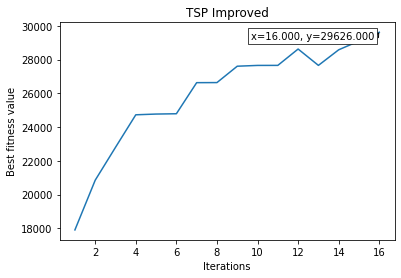

In [11]:
fig, ax = plt.subplots()
ax.plot(x_new,y_new)
plt.title("TSP Improved")
plt.xlabel("Iterations")
plt.ylabel("Best fitness value")

annot_max(x_new,y_new)
    

In [8]:
print(np.amax(y))

27705.0


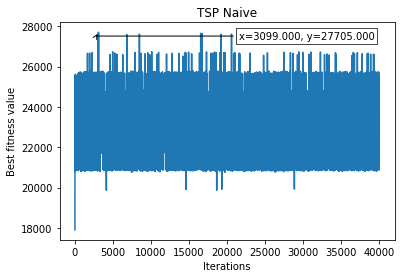

In [9]:
fig1, ax1 = plt.subplots()
ax1.plot(x,y)
plt.title("TSP Naive")
plt.xlabel("Iterations")
plt.ylabel("Best fitness value")
annot_max(x,y)